<a href="https://colab.research.google.com/github/wesleybeckner/technology_fundamentals/blob/main/C3%20Machine%20Learning%20I/SOLUTIONS/SOLUTION_Tech_Fun_C3_L2_Practice_with_Supervised_Learners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Technology Fundamentals Course 3, Lab 2: Practice with Supervised Learners

**Instructor**: Wesley Beckner

**Contact**: wesleybeckner@gmail.com

**Teaching Assitants**: Varsha Bang, Harsha Vardhan

**Contact**: vbang@uw.edu, harshav@uw.edu
<br>

---

<br>

In this lab we will continue to practice creation of pipelines, feature engineering, and applying learning algorithms.

Now that we have covered supervised learning methods, and we've covered Grid Search, we will use these tools to do a sophisticated, search of hyperparameter optimization.

<br>

---




# L3 Q1: 

Create train and test datasets for wine quality

Create new train/test datasets that are normalized (but have the same indices as the original train/test sets for comparison)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Code Cell for L1 Q1
df = pd.read_csv("https://raw.githubusercontent.com/wesleybeckner/"\
                 "ds_for_engineers/main/data/wine_quality/winequalityN.csv")

In [ ]:
# Code Cell for L1 Q1

# create X and y
X = df.copy()
y = X.pop('quality')

# split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y)

# the numerical values pipe
num_proc = make_pipeline(SimpleImputer(strategy='median'), # impute with median
                         StandardScaler()) # scale and center

# the categorical values pipe
cat_proc = make_pipeline(
    SimpleImputer(strategy='constant', 
                  fill_value='missing'), # impute with placeholder
    OneHotEncoder(handle_unknown='ignore')) # one hot encode

# parallelize the two pipes
preprocessor = make_column_transformer((num_proc,
                                make_column_selector(dtype_include=np.number)),
                                       (cat_proc,
                                make_column_selector(dtype_include=object)))

# L3 Q2:

Evaluate the performance of a Random Forest on classifying wine quality


In [ ]:
# Code Cell for L1 Q2
from sklearn.ensemble import RandomForestRegressor

In [ ]:
def MyPipeline(**kwargs):
    return make_pipeline(preprocessor,
                         RandomForestRegressor(**kwargs))

In [ ]:
model = MyPipeline()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test,y_test)

0.5007560699367017

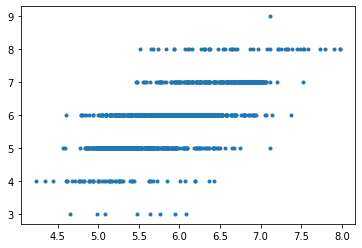

In [ ]:
plt.plot(y_pred, y_test, ls='', marker='.')

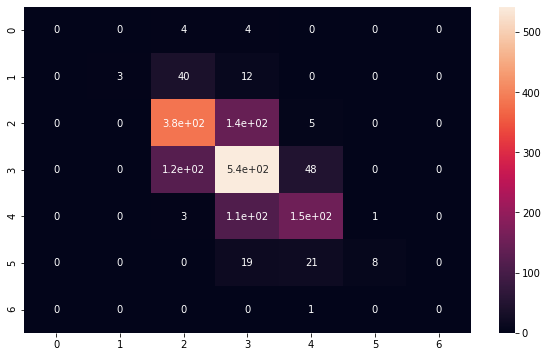

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,np.round(y_pred)),annot=True)

# L3 Q3:

Do a grid search to optimize your Random Forest model, use whatever hyperparameters you would like



In [ ]:
# Code Cell for L1 Q3
from sklearn.model_selection import GridSearchCV

param_grid = {'randomforestregressor__n_estimators': [100, 200, 300],
              'randomforestregressor__criterion': ['mse', 'mae'],
              'randomforestregressor__min_samples_leaf': [1,5]}

grid = GridSearchCV(MyPipeline(), param_grid, cv=3, verbose=3)

In [ ]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] randomforestregressor__criterion=mse, randomforestregressor__min_samples_leaf=1, randomforestregressor__n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  randomforestregressor__criterion=mse, randomforestregressor__min_samples_leaf=1, randomforestregressor__n_estimators=100, score=0.492, total=   2.1s
[CV] randomforestregressor__criterion=mse, randomforestregressor__min_samples_leaf=1, randomforestregressor__n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


[CV]  randomforestregressor__criterion=mse, randomforestregressor__min_samples_leaf=1, randomforestregressor__n_estimators=100, score=0.457, total=   2.1s
[CV] randomforestregressor__criterion=mse, randomforestregressor__min_samples_leaf=1, randomforestregressor__n_estimators=100 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.2s remaining:    0.0s


[CV]  randomforestregressor__criterion=mse, randomforestregressor__min_samples_leaf=1, randomforestregressor__n_estimators=100, score=0.462, total=   2.1s
[CV] randomforestregressor__criterion=mse, randomforestregressor__min_samples_leaf=1, randomforestregressor__n_estimators=200 
[CV]  randomforestregressor__criterion=mse, randomforestregressor__min_samples_leaf=1, randomforestregressor__n_estimators=200, score=0.495, total=   4.1s
[CV] randomforestregressor__criterion=mse, randomforestregressor__min_samples_leaf=1, randomforestregressor__n_estimators=200 
[CV]  randomforestregressor__criterion=mse, randomforestregressor__min_samples_leaf=1, randomforestregressor__n_estimators=200, score=0.458, total=   4.1s
[CV] randomforestregressor__criterion=mse, randomforestregressor__min_samples_leaf=1, randomforestregressor__n_estimators=200 
[CV]  randomforestregressor__criterion=mse, randomforestregressor__min_samples_leaf=1, randomforestregressor__n_estimators=200, score=0.462, total=   4.0s

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed: 37.0min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('columntransformer',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('pipeline-1',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('simpleimputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                  

In [ ]:
grid.best_params_

{'randomforestregressor__criterion': 'mse',
 'randomforestregressor__min_samples_leaf': 1,
 'randomforestregressor__n_estimators': 300}

In [ ]:
model = grid.best_estimator_